In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
# Paths to timings data
fenics_timings = "/home/cecile/dev/fenics-networks/applications/fenics/plots_perf/timings.txt"
fenicsx_timings = "/home/cecile/dev/networks_fenicsx/demos/demo_perf/timings.txt"

In [32]:
# Translate timings table into dictionnaries
df_fenics = pd.read_csv(fenics_timings, sep = "\t", index_col=0, header=0)
df_fenicsx = pd.read_csv(fenicsx_timings, sep = "\t", index_col=0)
fenics_dict = df_fenics.to_dict()
fenicsx_dict = df_fenicsx.to_dict()
print("fenics_dict = ", fenics_dict)

fenics_dict =  {'forms': {3.0: 9.902, 4.0: 8.39, 5.0: 14.549, 6.0: 29.919, 7.0: 61.113}, 'assembly': {3.0: 13.552, 4.0: 22.257, 5.0: 39.123, 6.0: 90.533, 7.0: 373.355}, 'solve': {3.0: 0.002, 4.0: 0.004, 5.0: 0.005, 6.0: 0.008, 7.0: 0.015}}


In [33]:
def n_dict(d: dict):
    new_dict = dict()
    for i,n in enumerate(list(d["forms"].keys())):
        new_dict[n] = dict()
        for key in list(d.keys()):
            new_dict[n][key] = list(d[key].values())[i]
    return new_dict

In [34]:
# Transform initial dictionnary into {n: {forms: x, assembly: x, solve: x}, ... }
fenics_n_dict = n_dict(fenics_dict)
fenicsx_n_dict = n_dict(fenicsx_dict)
print("fenics_n_dict = ", fenics_n_dict)
print("fenicsx_n_dict = ", fenicsx_n_dict)

fenics_n_dict =  {3.0: {'forms': 9.902, 'assembly': 13.552, 'solve': 0.002}, 4.0: {'forms': 8.39, 'assembly': 22.257, 'solve': 0.004}, 5.0: {'forms': 14.549, 'assembly': 39.123, 'solve': 0.005}, 6.0: {'forms': 29.919, 'assembly': 90.533, 'solve': 0.008}, 7.0: {'forms': 61.113, 'assembly': 373.355, 'solve': 0.015}}
fenicsx_n_dict =  {3.0: {'forms': 2.128, 'assembly': 0.004, 'solve': 0.001}, 4.0: {'forms': 2.147, 'assembly': 0.016, 'solve': 0.002}, 5.0: {'forms': 2.391, 'assembly': 0.242, 'solve': 0.01}, 6.0: {'forms': 3.271, 'assembly': 1.665, 'solve': 0.024}, 7.0: {'forms': 6.935, 'assembly': 78.96, 'solve': 0.17}}


br =  [-0.1, 0.9, 1.9]
fenics_n_dict[key].values() =  dict_values([9.902, 13.552, 0.002])
fenics_n_dict[key].values() =  dict_values([8.39, 22.257, 0.004])
fenics_n_dict[key].values() =  dict_values([14.549, 39.123, 0.005])
fenics_n_dict[key].values() =  dict_values([29.919, 90.533, 0.008])
fenics_n_dict[key].values() =  dict_values([61.113, 373.355, 0.015])


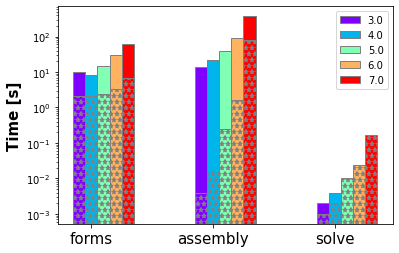

In [38]:
# Bar plots

barWidth = 0.1

# Set position of bar on X axis
first_key = list(fenics_n_dict.keys())[0]
br = np.arange(len(fenics_n_dict[first_key].keys()))
br = [x - barWidth for x in br]
print("br = ", br)

# Make the plot
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(list(fenics_n_dict.keys())))))
fig, ax = plt.subplots()
ax.set_yscale('log')

for i,key in enumerate(list(fenics_n_dict.keys())):
    c = next(color)
    print("fenics_n_dict[key].values() = ", fenics_n_dict[key].values())
    ax.bar(br, fenics_n_dict[key].values(), color=c, width=barWidth, 
           edgecolor='grey', label=str(key))
    ax.bar(br, fenicsx_n_dict[key].values(), color=c, width=barWidth, 
           edgecolor='grey', hatch='**')
    br = [x + barWidth for x in br]

# Adding labels / ticks
xlabels = ["forms", "assembly", "solve"]
ax.set_ylabel('Time [s]', fontweight='bold', fontsize=15)
ax.set_xticks(range(len(br)))
ax.set_xticklabels(xlabels, fontsize=15)
ax.legend()

plt.savefig("/home/cecile/dev/networks_fenicsx/demos/demo_perf/timings_comp.png")

